用 leo 新跑的 bert  
有 title 跟 content 一起跑的

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from glob import glob
import csv


In [1]:
# 連動雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# combine all athletes' bert csv

bert_all = glob('/content/drive/Shareddrives/Text Mining/CSV/Summary/Stage2/Mix_*.csv')
print(bert_all)


df_bert_all = pd.DataFrame()

for filename in bert_all:
  df = pd.read_csv(filename, header=0, index_col=0)
  df_bert_all = pd.concat([df_bert_all, df], axis=0)

df_bert_all = df_bert_all.reset_index(drop=True)
df_bert_all

['/content/drive/Shareddrives/Text Mining/CSV/Summary/Stage2/Mix_LEE.csv', '/content/drive/Shareddrives/Text Mining/CSV/Summary/Stage2/Mix_GUO.csv', '/content/drive/Shareddrives/Text Mining/CSV/Summary/Stage2/Mix_LIN.csv', '/content/drive/Shareddrives/Text Mining/CSV/Summary/Stage2/Mix_TAI.csv', '/content/drive/Shareddrives/Text Mining/CSV/Summary/Stage2/Mix_YANG.csv']


,category,title,content,limited_Bert,mix_predict,title_predict
0,新聞,李智凱秀妻子送他歲生日豪禮要當爸,三立李鴻典台北報導恭喜李智凱秀妻子送他歲生日豪禮要當爸爸了完整新聞內文恭喜再恭喜歲體操國手鞍...,李智凱秀妻子送他歲生日豪禮要當爸:三立李鴻典台北報導恭喜李智凱秀妻子送他歲生日豪禮要當爸爸了...,pos,pos
1,新聞,台灣首位世界第「鞍馬王子」李智凱,林岳甫台灣首位世界第「鞍馬王子」李智凱我會繼續努力完整新聞內文在東京奧運勇奪鞍馬銀牌，為台灣...,台灣首位世界第「鞍馬王子」李智凱:林岳甫台灣首位世界第「鞍馬王子」李智凱我會繼續努力完整新聞...,pos,pos
2,新聞,李智凱登鞍馬世界第恩師林育信報喜,游郁香李智凱登鞍馬世界第恩師林育信報喜希望鼓勵小選手追夢完整新聞內文「鞍馬王子」李智凱以招牌...,李智凱登鞍馬世界第恩師林育信報喜:游郁香李智凱登鞍馬世界第恩師林育信報喜希望鼓勵小選手追夢完...,pos,pos
3,問卦,台灣李智凱奧運體操為什麼能贏歐美中國,歐美中國算是體操大國，歐美中國也投資很多資源在體操為什麼在台灣培訓，被台灣教練訓練李智凱能夠...,台灣李智凱奧運體操為什麼能贏歐美中國:歐美中國算是體操大國，歐美中國也投資很多資源在體操為什...,pos,pos
4,問卦,李智凱敢挑戰街健嗎,街健肌肉應用最高形式完美控制身體藝術相比之下體操簡直是平淡創意卻企圖以華麗表演來掩飾李智凱雖...,李智凱敢挑戰街健嗎:街健肌肉應用最高形式完美控制身體藝術相比之下體操簡直是平淡創意卻企圖以華...,pos,pos
...,...,...,...,...,...,...
428,問卦,楊勇緯身高會被台女嫌矮嗎,如題一堆台女說沒直接不考慮我們台灣之光勇緯身高公分但為國爭光又有顏值是不是還是入不了台女眼有...,楊勇緯身高會被台女嫌矮嗎:如題一堆台女說沒直接不考慮我們台灣之光勇緯身高公分但為國爭光又有顏...,pos,pos
429,問卦,台中柔道館楊勇緯,台中柔道館有殺人戰經驗，世界柔道二把手楊勇緯有能力踢館嗎?還是被慘摔次，醫院見?,台中柔道館楊勇緯:台中柔道館有殺人戰經驗，世界柔道二把手楊勇緯有能力踢館嗎?還是被慘摔次，醫院見?,neg,pos
430,新聞,楊勇緯奪台灣第一面獎牌蔡英文恭賀,王怡翔三立新聞東京奧運日柔道項目傳出捷報，台灣好手楊勇緯闖進金牌戰，雖然不敵日本好手高藤直壽...,楊勇緯奪台灣第一面獎牌蔡英文恭賀:王怡翔三立新聞東京奧運日柔道項目傳出捷報，台灣好手楊勇緯闖...,pos,pos
431,問卦,高藤直壽幹嘛把楊勇緯的手手舉起來,大家都有看比賽吧所以我就不提供圖片了比賽最後結束時候日本選手高藤直壽帶領著小鮮肉楊勇緯把他手...,高藤直壽幹嘛把楊勇緯的手手舉起來:大家都有看比賽吧所以我就不提供圖片了比賽最後結束時候日本選...,neg,neg


In [ ]:
# 切割 title pos/neg

df_bert_all['mix_NEG'] = np.where(df_bert_all['mix_predict']=="neg", '1', '0')
df_bert_all['mix_POS'] = np.where(df_bert_all['mix_predict']=="pos", '1', '0')

df_bert_all['title_NEG'] = np.where(df_bert_all['title_predict']=="neg", '1', '0')
df_bert_all['title_POS'] = np.where(df_bert_all['title_predict']=="pos", '1', '0')

df_bert_all

,category,title,content,limited_Bert,mix_predict,title_predict,mix_NEG,mix_POS,title_NEG,title_POS
0,新聞,李智凱秀妻子送他歲生日豪禮要當爸,三立李鴻典台北報導恭喜李智凱秀妻子送他歲生日豪禮要當爸爸了完整新聞內文恭喜再恭喜歲體操國手鞍...,李智凱秀妻子送他歲生日豪禮要當爸:三立李鴻典台北報導恭喜李智凱秀妻子送他歲生日豪禮要當爸爸了...,pos,pos,0,1,0,1
1,新聞,台灣首位世界第「鞍馬王子」李智凱,林岳甫台灣首位世界第「鞍馬王子」李智凱我會繼續努力完整新聞內文在東京奧運勇奪鞍馬銀牌，為台灣...,台灣首位世界第「鞍馬王子」李智凱:林岳甫台灣首位世界第「鞍馬王子」李智凱我會繼續努力完整新聞...,pos,pos,0,1,0,1
2,新聞,李智凱登鞍馬世界第恩師林育信報喜,游郁香李智凱登鞍馬世界第恩師林育信報喜希望鼓勵小選手追夢完整新聞內文「鞍馬王子」李智凱以招牌...,李智凱登鞍馬世界第恩師林育信報喜:游郁香李智凱登鞍馬世界第恩師林育信報喜希望鼓勵小選手追夢完...,pos,pos,0,1,0,1
3,問卦,台灣李智凱奧運體操為什麼能贏歐美中國,歐美中國算是體操大國，歐美中國也投資很多資源在體操為什麼在台灣培訓，被台灣教練訓練李智凱能夠...,台灣李智凱奧運體操為什麼能贏歐美中國:歐美中國算是體操大國，歐美中國也投資很多資源在體操為什...,pos,pos,0,1,0,1
4,問卦,李智凱敢挑戰街健嗎,街健肌肉應用最高形式完美控制身體藝術相比之下體操簡直是平淡創意卻企圖以華麗表演來掩飾李智凱雖...,李智凱敢挑戰街健嗎:街健肌肉應用最高形式完美控制身體藝術相比之下體操簡直是平淡創意卻企圖以華...,pos,pos,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
428,問卦,楊勇緯身高會被台女嫌矮嗎,如題一堆台女說沒直接不考慮我們台灣之光勇緯身高公分但為國爭光又有顏值是不是還是入不了台女眼有...,楊勇緯身高會被台女嫌矮嗎:如題一堆台女說沒直接不考慮我們台灣之光勇緯身高公分但為國爭光又有顏...,pos,pos,0,1,0,1
429,問卦,台中柔道館楊勇緯,台中柔道館有殺人戰經驗，世界柔道二把手楊勇緯有能力踢館嗎?還是被慘摔次，醫院見?,台中柔道館楊勇緯:台中柔道館有殺人戰經驗，世界柔道二把手楊勇緯有能力踢館嗎?還是被慘摔次，醫院見?,neg,pos,1,0,0,1
430,新聞,楊勇緯奪台灣第一面獎牌蔡英文恭賀,王怡翔三立新聞東京奧運日柔道項目傳出捷報，台灣好手楊勇緯闖進金牌戰，雖然不敵日本好手高藤直壽...,楊勇緯奪台灣第一面獎牌蔡英文恭賀:王怡翔三立新聞東京奧運日柔道項目傳出捷報，台灣好手楊勇緯闖...,pos,pos,0,1,0,1
431,問卦,高藤直壽幹嘛把楊勇緯的手手舉起來,大家都有看比賽吧所以我就不提供圖片了比賽最後結束時候日本選手高藤直壽帶領著小鮮肉楊勇緯把他手...,高藤直壽幹嘛把楊勇緯的手手舉起來:大家都有看比賽吧所以我就不提供圖片了比賽最後結束時候日本選...,neg,neg,1,0,1,0


In [4]:
# 合併 comment num
# 這個 list 不能用，因為順序不一樣

files = glob('/content/drive/Shareddrives/Text Mining/CSV/Crawler/comments_num_output_*.csv')
print(files)

all_comments_num = []

for filename in files:
  with open(filename, newline='') as f:
    reader = csv.reader(f)
    all_comments_num = all_comments_num + list(reader)[0]

print(len(all_comments_num))

['/content/drive/Shareddrives/Text Mining/CSV/Crawler/comments_num_output_TAI.csv', '/content/drive/Shareddrives/Text Mining/CSV/Crawler/comments_num_output_GUO.csv', '/content/drive/Shareddrives/Text Mining/CSV/Crawler/comments_num_output_LIN.csv', '/content/drive/Shareddrives/Text Mining/CSV/Crawler/comments_num_output_YANG.csv', '/content/drive/Shareddrives/Text Mining/CSV/Crawler/comments_num_output_LEE.csv']
433


In [12]:
# 存成留言數量 csv 方便之後使用
files = glob('/content/drive/Shareddrives/Text Mining/CSV/Crawler/comments_num_output_*.csv')
print(files)

all_comments_num_df = pd.DataFrame()

for filename in files:
  df = pd.read_csv(filename, header=None)
  all_comments_num_df = pd.concat([all_comments_num_df, df], axis=1)

print(all_comments_num_df)


all_comments_num_df = all_comments_num_df.T
all_comments_num_df = all_comments_num_df.reset_index(drop=True)
all_comments_num_df.columns=['comments']
print(all_comments_num_df)

all_comments_num_df.to_csv('/content/drive/Shareddrives/Text Mining/CSV/temp_keymoji_K/all_comments_num.csv')

['/content/drive/Shareddrives/Text Mining/CSV/Crawler/comments_num_output_TAI.csv', '/content/drive/Shareddrives/Text Mining/CSV/Crawler/comments_num_output_GUO.csv', '/content/drive/Shareddrives/Text Mining/CSV/Crawler/comments_num_output_LIN.csv', '/content/drive/Shareddrives/Text Mining/CSV/Crawler/comments_num_output_YANG.csv', '/content/drive/Shareddrives/Text Mining/CSV/Crawler/comments_num_output_LEE.csv']
   0   1   2    3   4   5    6   7   8   9   ...   23   24  25  26  27   28  \
0   2  22  34  531  15  15  160  28   8   7  ...  379  165   7   6  91  863   

    29  30   31  32  
0  376  63  114   8  

[1 rows x 433 columns]
     comments
0           2
1          22
2          34
3         531
4          15
..        ...
428       863
429       376
430        63
431       114
432         8

[433 rows x 1 columns]


In [14]:
data = pd.read_csv('/content/drive/Shareddrives/Text Mining/CSV/temp_keymoji_K/mix_all_athelete_comments.csv')
data

,category,title,content,limited_Bert,mix_predict,title_predict,comments
0,新聞,李智凱秀妻子送他歲生日豪禮要當爸,三立李鴻典台北報導恭喜李智凱秀妻子送他歲生日豪禮要當爸爸了完整新聞內文恭喜再恭喜歲體操國手鞍...,李智凱秀妻子送他歲生日豪禮要當爸:三立李鴻典台北報導恭喜李智凱秀妻子送他歲生日豪禮要當爸爸了...,pos,pos,17
1,新聞,台灣首位世界第「鞍馬王子」李智凱,林岳甫台灣首位世界第「鞍馬王子」李智凱我會繼續努力完整新聞內文在東京奧運勇奪鞍馬銀牌，為台灣...,台灣首位世界第「鞍馬王子」李智凱:林岳甫台灣首位世界第「鞍馬王子」李智凱我會繼續努力完整新聞...,pos,pos,11
2,新聞,李智凱登鞍馬世界第恩師林育信報喜,游郁香李智凱登鞍馬世界第恩師林育信報喜希望鼓勵小選手追夢完整新聞內文「鞍馬王子」李智凱以招牌...,李智凱登鞍馬世界第恩師林育信報喜:游郁香李智凱登鞍馬世界第恩師林育信報喜希望鼓勵小選手追夢完...,pos,pos,264
3,問卦,台灣李智凱奧運體操為什麼能贏歐美中國,歐美中國算是體操大國，歐美中國也投資很多資源在體操為什麼在台灣培訓，被台灣教練訓練李智凱能夠...,台灣李智凱奧運體操為什麼能贏歐美中國:歐美中國算是體操大國，歐美中國也投資很多資源在體操為什...,pos,pos,13
4,問卦,李智凱敢挑戰街健嗎,街健肌肉應用最高形式完美控制身體藝術相比之下體操簡直是平淡創意卻企圖以華麗表演來掩飾李智凱雖...,李智凱敢挑戰街健嗎:街健肌肉應用最高形式完美控制身體藝術相比之下體操簡直是平淡創意卻企圖以華...,pos,pos,37
...,...,...,...,...,...,...,...
428,新聞,柯宇綸截圖質疑「郭婞淳教練擁抱舉動」,潘鈺楨柯宇綸截圖質疑「郭婞淳教練擁抱舉動」遭出征堅不刪文行為不自己判斷完整新聞內文「舉重女神...,柯宇綸截圖質疑「郭婞淳教練擁抱舉動」:潘鈺楨柯宇綸截圖質疑「郭婞淳教練擁抱舉動」遭出征堅不刪...,neg,neg,101
429,新聞,郭婞淳昔憂東奧正名無法出賽遭出征,中時中時新聞網趙偉陵中時季志翔郭婞淳昔憂東奧正名無法出賽遭出征奪金牌逆風成台灣之光完整新聞內...,郭婞淳昔憂東奧正名無法出賽遭出征:中時中時新聞網趙偉陵中時季志翔郭婞淳昔憂東奧正名無法出賽遭...,pos,neg,285
430,問卦,喂郭婞淳被教練擁抱時應該要甚麼表情才可以?,本佛納悶甚麼女權甲權余祥拳其實哀洞凱爾只要有一點點血性正常人台灣隔了年才又拿到奧運金牌一個跟...,喂郭婞淳被教練擁抱時應該要甚麼表情才可以?:本佛納悶甚麼女權甲權余祥拳其實哀洞凱爾只要有一點...,neg,pos,77
431,新聞,把郭婞淳寫成陳玟卉挨轟吳思瑤落淚致歉,新頭殼陳佩君台北市報導把郭婞淳寫成陳玟卉挨轟吳思瑤落淚致歉「再錯切腹」「舉重女神」郭婞淳昨天...,把郭婞淳寫成陳玟卉挨轟吳思瑤落淚致歉:新頭殼陳佩君台北市報導把郭婞淳寫成陳玟卉挨轟吳思瑤落淚...,neg,neg,212


In [15]:
# 目前是用這個 csv 預測
temp = pd.read_csv('/content/drive/Shareddrives/Text Mining/CSV/temp_keymoji_K/temp.csv')
temp

,category,mix_predict,title_predict,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,comments
0,1,pos,pos,0.7251,5.4967,0.4470,0.4347,6.0957,1.3124,5.8269,5.2276,17
1,1,pos,pos,0.4990,7.0486,0.5004,0.3577,7.2615,0.8641,6.1154,6.7392,11
2,1,pos,pos,0.8893,7.6680,1.0379,0.7563,7.2815,1.3384,7.0499,6.5321,264
3,2,pos,pos,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,13
4,2,pos,pos,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37
...,...,...,...,...,...,...,...,...,...,...,...,...
370,1,neg,neg,8.4973,0.7314,8.4190,8.0992,1.4839,8.5586,2.2353,2.0367,101
371,1,pos,neg,1.2011,0.9404,0.9429,1.1693,0.9027,2.3210,0.8875,0.7393,285
372,2,neg,pos,6.6478,0.2382,6.1981,6.6203,1.7261,6.9905,2.2559,0.6784,77
373,1,neg,neg,1.0391,0.2730,0.8457,0.7389,0.1788,1.0394,0.5290,0.5312,212


In [16]:
# 重新排序col name順序
temp = temp[['category', 'mix_predict', 'title_predict', 'Trust', 'Joy', 'Surprise', 'Anticipation', 'Fear', 'Anger', 'Disgust', 'Sadness', 'comments']]
temp

,category,mix_predict,title_predict,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness,comments
0,1,pos,pos,5.2276,6.0957,5.8269,5.4967,0.4347,0.7251,0.4470,1.3124,17
1,1,pos,pos,6.7392,7.2615,6.1154,7.0486,0.3577,0.4990,0.5004,0.8641,11
2,1,pos,pos,6.5321,7.2815,7.0499,7.6680,0.7563,0.8893,1.0379,1.3384,264
3,2,pos,pos,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,13
4,2,pos,pos,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37
...,...,...,...,...,...,...,...,...,...,...,...,...
370,1,neg,neg,2.0367,1.4839,2.2353,0.7314,8.0992,8.4973,8.4190,8.5586,101
371,1,pos,neg,0.7393,0.9027,0.8875,0.9404,1.1693,1.2011,0.9429,2.3210,285
372,2,neg,pos,0.6784,1.7261,2.2559,0.2382,6.6203,6.6478,6.1981,6.9905,77
373,1,neg,neg,0.5312,0.1788,0.5290,0.2730,0.7389,1.0391,0.8457,1.0394,212


In [17]:
# 輸出給 leo
temp.to_csv('/content/drive/Shareddrives/Text Mining/CSV/temp_keymoji_K/temp_0613.csv')

In [22]:
# remove keymoji = 0
temp = temp[temp.Trust != 0]
temp

,category,mix_predict,title_predict,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness,comments
0,1,pos,pos,5.2276,6.0957,5.8269,5.4967,0.4347,0.7251,0.4470,1.3124,17
1,1,pos,pos,6.7392,7.2615,6.1154,7.0486,0.3577,0.4990,0.5004,0.8641,11
2,1,pos,pos,6.5321,7.2815,7.0499,7.6680,0.7563,0.8893,1.0379,1.3384,264
5,2,pos,neg,0.7988,0.7348,0.1838,0.0977,5.7180,5.2093,5.5036,5.8055,1
6,2,neg,neg,1.9442,0.7051,1.3637,0.4363,7.9398,7.6130,8.1667,7.5377,11
...,...,...,...,...,...,...,...,...,...,...,...,...
368,2,neg,neg,1.4795,0.3989,0.9883,0.4617,7.2876,6.5310,6.8515,7.3672,1
370,1,neg,neg,2.0367,1.4839,2.2353,0.7314,8.0992,8.4973,8.4190,8.5586,101
371,1,pos,neg,0.7393,0.9027,0.8875,0.9404,1.1693,1.2011,0.9429,2.3210,285
372,2,neg,pos,0.6784,1.7261,2.2559,0.2382,6.6203,6.6478,6.1981,6.9905,77


In [27]:
# 切割 title pos/neg

temp['mix_NEG'] = np.where(temp['mix_predict']=="neg", '1', '0')
temp['mix_POS'] = np.where(temp['mix_predict']=="pos", '1', '0')

temp['title_NEG'] = np.where(temp['title_predict']=="neg", '1', '0')
temp['title_POS'] = np.where(temp['title_predict']=="pos", '1', '0')

temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,category,mix_predict,title_predict,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness,comments,mix_NEG,mix_POS,title_NEG,title_POS
0,1,pos,pos,5.2276,6.0957,5.8269,5.4967,0.4347,0.7251,0.4470,1.3124,17,0,1,0,1
1,1,pos,pos,6.7392,7.2615,6.1154,7.0486,0.3577,0.4990,0.5004,0.8641,11,0,1,0,1
2,1,pos,pos,6.5321,7.2815,7.0499,7.6680,0.7563,0.8893,1.0379,1.3384,264,0,1,0,1
5,2,pos,neg,0.7988,0.7348,0.1838,0.0977,5.7180,5.2093,5.5036,5.8055,1,0,1,1,0
6,2,neg,neg,1.9442,0.7051,1.3637,0.4363,7.9398,7.6130,8.1667,7.5377,11,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2,neg,neg,1.4795,0.3989,0.9883,0.4617,7.2876,6.5310,6.8515,7.3672,1,1,0,1,0
370,1,neg,neg,2.0367,1.4839,2.2353,0.7314,8.0992,8.4973,8.4190,8.5586,101,1,0,1,0
371,1,pos,neg,0.7393,0.9027,0.8875,0.9404,1.1693,1.2011,0.9429,2.3210,285,0,1,1,0
372,2,neg,pos,0.6784,1.7261,2.2559,0.2382,6.6203,6.6478,6.1981,6.9905,77,1,0,0,1


In [31]:
temp.dtypes

category         float64
mix_predict       object
title_predict     object
Trust            float64
Joy              float64
Surprise         float64
Anticipation     float64
Fear             float64
Anger            float64
Disgust          float64
Sadness          float64
comments         float64
mix_NEG           object
mix_POS           object
title_NEG         object
title_POS         object
dtype: object

In [32]:
# 把 object 轉成 float
temp['mix_NEG'] = temp['mix_NEG'].astype(float, errors = 'raise')
temp['mix_POS'] = temp['mix_POS'].astype(float, errors = 'raise')
temp['title_NEG'] = temp['title_NEG'].astype(float, errors = 'raise')
temp['title_POS'] = temp['title_POS'].astype(float, errors = 'raise')

print(temp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 373
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       213 non-null    float64
 1   mix_predict    213 non-null    object 
 2   title_predict  213 non-null    object 
 3   Trust          213 non-null    float64
 4   Joy            213 non-null    float64
 5   Surprise       213 non-null    float64
 6   Anticipation   213 non-null    float64
 7   Fear           213 non-null    float64
 8   Anger          213 non-null    float64
 9   Disgust        213 non-null    float64
 10  Sadness        213 non-null    float64
 11  comments       213 non-null    float64
 12  mix_NEG        213 non-null    float64
 13  mix_POS        213 non-null    float64
 14  title_NEG      213 non-null    float64
 15  title_POS      213 non-null    float64
dtypes: float64(14), object(2)
memory usage: 28.3+ KB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [120]:
# RF train
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(temp.drop(columns=['mix_predict', 'title_predict', 'comments'], axis=1), temp['comments'], test_size=0.33, random_state=42)

# Label_Encoder
labelencoder = LabelEncoder()
columns = ['category', 'Trust', 'Joy', 'Surprise', 'Anticipation', 'Fear', 'Anger', 'Disgust', 'Sadness', 'mix_NEG','mix_POS', 'title_NEG', 'title_POS']
for col_name in columns: 
    train_x[col_name] = labelencoder.fit_transform(train_x[col_name])

In [121]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(train_x, train_y)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [122]:
from sklearn.ensemble import RandomForestRegressor
y_pred = regressor.predict(test_x)
y_pred

array([ 94.33791667, 330.191     , 322.85      , 115.60658333,
        82.11366667,  72.31966667, 161.06415   , 334.001     ,
       330.83475   , 145.94575   , 323.22      ,  67.8795    ,
       315.402     , 327.69241667,  72.06766667,  82.16366667,
       102.10325   ,  97.63941667, 327.673     ,  81.10166667,
        81.11666667, 318.12      ,  81.59266667,  86.98275   ,
        97.14241667,  70.40766667,  49.84116667,  94.37108333,
       327.142     ,  91.81391667,  89.17566667, 330.041     ,
       330.37      ,  66.56591667, 327.69241667,  89.17566667,
        69.38966667,  83.09766667,  51.61416667,  52.43916667,
        95.14366667,  91.50391667, 326.189     , 323.4       ,
        89.17566667,  97.37941667,  50.567     , 329.22      ,
       116.70818333, 334.573     ,  75.086     ,  51.22316667,
       358.44941667, 316.879     , 317.95      , 331.656     ,
       317.958     ,  51.61416667,  69.38966667, 327.69241667,
        94.60091667, 316.898     ,  86.89566667, 329.80

In [128]:
test_y.to_numpy()

array([290.,  42., 349.,  13., 104.,  16., 124.,   2.,  60.,  16.,  22.,
       213.,  16., 104.,   0., 293., 154., 165., 257., 551.,  55.,   1.,
       285.,  16., 107., 145.,   6.,  45.,  30.,  36.,   9.,   9.,  27.,
         7.,   4.,  56.,  12., 292., 131.,  22.,  36.,   7., 107.,   5.,
       152.,  26.,   1.,  18.,  11.,  44.,  52.,  38.,  12.,   5.,   2.,
         7.,   4.,  26.,  71.,  48.,  13.,  14.,  17.,  48.,   9.,  18.,
       229., 636.,  13.,   7.,  21.])

In [129]:
# Calculate the absolute errors
errors = abs(y_pred - test_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 168.97 degrees.
Accuracy: -inf %.


In [92]:
from sklearn.ensemble import RandomForestRegressor

# 建立RandomForestRegressor模型
randomForestModel = RandomForestRegressor(n_estimators=1000, random_state=42)
# 使用訓練資料訓練模型
randomForestModel.fit(train_x, train_y.values.ravel().astype(np.float64))
# 使用訓練資料預測
predictions = randomForestModel.predict(test_x)
# Calculate the absolute errors
errors = abs(predictions - test_y.values.ravel().astype(np.float64))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 168.97 degrees.


In [93]:
features = train_x.columns.to_list()
feature_importances = randomForestModel.feature_importances_
forest_importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)
print("The firstly important features is: ", forest_importances.index[0])
print("The secondly important features is: ", forest_importances.index[1])
print("The thirdly important features is: ", forest_importances.index[2])

The firstly important features is:  Sadness
The secondly important features is:  Anger
The thirdly important features is:  Surprise


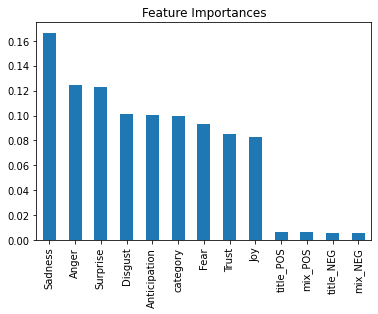

In [94]:
forest_importances.plot.bar()
plt.title('Feature Importances')
plt.show()

# 以下是舊的

In [ ]:
# import keymoji scores into dataframe

keymoji_all = glob('/content/drive/Shareddrives/Text Mining/CSV/Keymoji/KeyMoji_score_*.csv')
#keymoji_all = glob('/content/drive/MyDrive/Colab Notebooks/final/csv/Keymoji/KeyMoji_score_*.csv')
print(keymoji_all)


df_key_all = pd.DataFrame()

for filename in keymoji_all:
  df = pd.read_csv(filename, header=0, index_col=0)
  df_key_all = pd.concat([df_key_all, df], axis=0)

df_key_all = df_key_all.reset_index(drop=True)
df_key_all

['/content/drive/Shareddrives/Text Mining/CSV/Keymoji/KeyMoji_score_GUO.csv', '/content/drive/Shareddrives/Text Mining/CSV/Keymoji/KeyMoji_score_YANG.csv', '/content/drive/Shareddrives/Text Mining/CSV/Keymoji/KeyMoji_score_LEE.csv', '/content/drive/Shareddrives/Text Mining/CSV/Keymoji/KeyMoji_score_LIN.csv', '/content/drive/Shareddrives/Text Mining/CSV/Keymoji/KeyMoji_score_TAI.csv']


,Title,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,問卦歐美中國舉重同量級無法超越台灣郭婞淳,2.4902,0.5397,12.5000,0.5853,0.5593,2.3929,0.5058,0.5238
1,新聞世錦賽舉重女神郭婞淳挺舉總和,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,爆卦郭婞淳2021舉重世錦賽挺舉總和金牌,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,問卦郭婞淳國語也太不標準了吧,0.2071,0.7107,0.2502,0.0500,0.5348,0.2662,0.2890,0.5320
4,問卦如果郭婞淳的故事拍電影讓瑤瑤演可以嗎,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...
428,新聞陳其邁暖迎戴資穎讓她吃好睡好小,0.4321,0.8954,0.0990,0.2308,3.0642,0.8822,2.0326,2.2016
429,問卦戴資穎受訪的時候要問他什麼,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
430,新聞戴資穎深夜罕見動怒被批沒奪金失誤,0.4184,0.3327,0.4360,0.4340,0.3128,0.4940,0.4748,0.3760
431,新聞戴資穎返台罕見說重話回文站在場上,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
# merge原本的df跟keymoji
data_all = pd.merge(data, df_key_all, how='outer', left_index=True, right_index=True)
print(data_all)

# Title_y改名Title
data_all = data_all.rename(columns={'Title_y' : 'Title'})

# drop有符號的title_x
data_all = data_all.drop(columns=['Title_x'])

# 重新排序col name順序
data_all = data_all[['Title', 'Prediction', 'NEG', 'POS', 'Trust', 'Joy', 'Surprise', 'Anticipation', 'Fear', 'Anger', 'Disgust', 'Sadness']]
data_all


                            Title_x Prediction NEG POS               Title_y  \
0    [問卦]歐美中國舉重同量級無法超越台灣郭婞淳？               neg   1   0  問卦歐美中國舉重同量級無法超越台灣郭婞淳   
1    [新聞] 世錦賽》「舉重女神」郭婞淳挺舉、總和               pos   0   1      新聞世錦賽舉重女神郭婞淳挺舉總和   
2    [爆卦] 郭婞淳2021舉重世錦賽挺舉&總和金牌              pos   0   1  爆卦郭婞淳2021舉重世錦賽挺舉總和金牌   
3    [問卦] 郭婞淳國語也太不標準了吧？                    neg   1   0        問卦郭婞淳國語也太不標準了吧   
4    [問卦] 如果郭婞淳的故事拍電影讓瑤瑤演可以嗎？              pos   0   1  問卦如果郭婞淳的故事拍電影讓瑤瑤演可以嗎   
..                              ...        ...  ..  ..                   ...   
428  [問卦] 楊勇緯身高167 會被台女嫌矮嗎？                neg   1   0     新聞陳其邁暖迎戴資穎讓她吃好睡好小   
429  [問卦] 台中柔道館vs楊勇緯                       neg   1   0       問卦戴資穎受訪的時候要問他什麼   
430  [新聞] 楊勇緯奪台灣第一面獎牌　蔡英文恭賀：               pos   0   1    新聞戴資穎深夜罕見動怒被批沒奪金失誤   
431  [問卦] 高藤直壽幹嘛把楊勇緯的手手舉起來？                neg   1   0    新聞戴資穎返台罕見說重話回文站在場上   
432  [新聞] 「讓世界看見台灣柔道」楊勇緯：我要的               pos   0   1    新聞幻象伴飛戴資穎麟洋配蔡壁如發文誤   

      Anger  Anticipation  Disgust    F

,Title,Prediction,NEG,POS,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness
0,問卦歐美中國舉重同量級無法超越台灣郭婞淳,neg,1,0,0.5238,0.5593,0.5058,0.5397,0.5853,2.4902,12.5000,2.3929
1,新聞世錦賽舉重女神郭婞淳挺舉總和,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,爆卦郭婞淳2021舉重世錦賽挺舉總和金牌,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,問卦郭婞淳國語也太不標準了吧,neg,1,0,0.5320,0.5348,0.2890,0.7107,0.0500,0.2071,0.2502,0.2662
4,問卦如果郭婞淳的故事拍電影讓瑤瑤演可以嗎,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
428,新聞陳其邁暖迎戴資穎讓她吃好睡好小,neg,1,0,2.2016,3.0642,2.0326,0.8954,0.2308,0.4321,0.0990,0.8822
429,問卦戴資穎受訪的時候要問他什麼,neg,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
430,新聞戴資穎深夜罕見動怒被批沒奪金失誤,pos,0,1,0.3760,0.3128,0.4748,0.3327,0.4340,0.4184,0.4360,0.4940
431,新聞戴資穎返台罕見說重話回文站在場上,neg,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
# 判斷是否為極值
# 每個情緒指標最高12.5分，若負向或正向其中一者超過5，則表示為極值，因此label為1
pos_sum = data_all["Trust"] + data_all["Joy"] + data_all["Surprise"] + data_all["Anticipation"]
neg_sum = data_all["Fear"] + data_all["Anger"] + data_all["Sadness"] + data_all["Disgust"]

# print(np.mean(pos_sum)) = 5.289057505773668
# print(np.mean(neg_sum)) = 4.238909699769053

data_all['IS_EXTREME'] = np.where((pos_sum>5) | (neg_sum>5), '1', '0')
data_all

,Title,Prediction,NEG,POS,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness,IS_EXTREME
0,問卦歐美中國舉重同量級無法超越台灣郭婞淳,neg,1,0,0.5238,0.5593,0.5058,0.5397,0.5853,2.4902,12.5000,2.3929,1
1,新聞世錦賽舉重女神郭婞淳挺舉總和,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
2,爆卦郭婞淳2021舉重世錦賽挺舉總和金牌,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
3,問卦郭婞淳國語也太不標準了吧,neg,1,0,0.5320,0.5348,0.2890,0.7107,0.0500,0.2071,0.2502,0.2662,0
4,問卦如果郭婞淳的故事拍電影讓瑤瑤演可以嗎,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,新聞陳其邁暖迎戴資穎讓她吃好睡好小,neg,1,0,2.2016,3.0642,2.0326,0.8954,0.2308,0.4321,0.0990,0.8822,1
429,問卦戴資穎受訪的時候要問他什麼,neg,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
430,新聞戴資穎深夜罕見動怒被批沒奪金失誤,pos,0,1,0.3760,0.3128,0.4748,0.3327,0.4340,0.4184,0.4360,0.4940,0
431,新聞戴資穎返台罕見說重話回文站在場上,neg,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0


In [ ]:
# 把 comment num csv 轉成df的一個column

files = glob('/content/drive/MyDrive/Colab Notebooks/final/csv/comments_num_output_*.csv')
print(files)

#csv寫法
all_comments_num = []

for filename in files:
  with open(filename, newline='') as f:
    reader = csv.reader(f)
    all_comments_num = all_comments_num + list(reader)[0]

print(len(all_comments_num))

#pandas寫法
# df_comments = pd.DataFrame()

# for filename in files:
#   df = pd.read_csv(filename, header=None)
#   df_comments = pd.concat([df_comments, df], axis=1)

# print(df_comments)


# df_comments_T = df_comments.T
# df_comments_T = df_comments_T.reset_index(drop=True)
# df_comments_T.columns=['comments']
# print(df_comments_T)

['/content/drive/MyDrive/Colab Notebooks/final/csv/comments_num_output_GUO.csv', '/content/drive/MyDrive/Colab Notebooks/final/csv/comments_num_output_LEE.csv', '/content/drive/MyDrive/Colab Notebooks/final/csv/comments_num_output_LIN.csv', '/content/drive/MyDrive/Colab Notebooks/final/csv/comments_num_output_TAI.csv', '/content/drive/MyDrive/Colab Notebooks/final/csv/comments_num_output_YANG.csv']
433


In [ ]:
# data_all = pd.merge(data, df1, how='outer', left_index=True, right_index=True)
data_all['comments'] = all_comments_num
data_all

,Title,Prediction,NEG,POS,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness,IS_EXTREME,comments
0,問卦歐美中國舉重同量級無法超越台灣郭婞淳,neg,1,0,0.5238,0.5593,0.5058,0.5397,0.5853,2.4902,12.5000,2.3929,1,13
1,新聞世錦賽舉重女神郭婞淳挺舉總和,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,16
2,爆卦郭婞淳2021舉重世錦賽挺舉總和金牌,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,143
3,問卦郭婞淳國語也太不標準了吧,neg,1,0,0.5320,0.5348,0.2890,0.7107,0.0500,0.2071,0.2502,0.2662,0,69
4,問卦如果郭婞淳的故事拍電影讓瑤瑤演可以嗎,pos,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,新聞陳其邁暖迎戴資穎讓她吃好睡好小,neg,1,0,2.2016,3.0642,2.0326,0.8954,0.2308,0.4321,0.0990,0.8822,1,191
429,問卦戴資穎受訪的時候要問他什麼,neg,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,11
430,新聞戴資穎深夜罕見動怒被批沒奪金失誤,pos,0,1,0.3760,0.3128,0.4748,0.3327,0.4340,0.4184,0.4360,0.4940,0,303
431,新聞戴資穎返台罕見說重話回文站在場上,neg,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,30


In [ ]:
# RF train
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_all.drop(columns=['Title', 'Prediction', 'comments'], axis=1), data_all[['comments']], test_size=0.33, random_state=42)

# Label_Encoder
labelencoder = LabelEncoder()
columns = ['NEG', 'POS','Trust', 'Joy', 'Surprise', 'Anticipation', 'Fear', 'Anger', 'Disgust', 'Sadness', 'IS_EXTREME']
for col_name in columns: 
    train_x[col_name] = labelencoder.fit_transform(train_x[col_name])

In [ ]:
train_x

,NEG,POS,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness,IS_EXTREME
109,0,1,69,59,65,64,42,49,50,62,1
196,1,0,0,0,0,0,0,0,0,0,0
145,0,1,16,5,11,1,49,43,26,37,0
199,1,0,0,0,0,0,0,0,0,0,0
327,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
71,0,1,0,0,0,0,0,0,0,0,0
106,1,0,42,47,47,8,82,84,83,84,1
270,0,1,0,0,0,0,0,0,0,0,0
348,0,1,44,6,24,27,81,79,81,74,1


In [ ]:
train_y

,comments
109,13
196,12
145,3
199,48
327,64
...,...
71,16
106,11
270,81
348,87


In [ ]:
test_x

,NEG,POS,Trust,Joy,Surprise,Anticipation,Fear,Anger,Disgust,Sadness,IS_EXTREME
425,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
75,0,1,5.9788,8.4453,8.0968,7.0263,0.9599,1.3461,0.7851,2.3931,1
181,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
30,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
364,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...
386,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
318,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
218,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
338,0,1,6.3877,8.3266,7.5942,7.2969,0.0940,0.7638,0.2988,1.5347,1


In [ ]:
test_y

,comments
425,113
75,12
181,21
30,13
364,23
...,...
386,107
318,27
218,133
338,227


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 建立RandomForestRegressor模型
randomForestModel = RandomForestRegressor(n_estimators=100, random_state=42)
# 使用訓練資料訓練模型
randomForestModel.fit(train_x, train_y.values.ravel().astype(np.float64))
# 使用訓練資料預測
predictions = randomForestModel.predict(test_x)
# Calculate the absolute errors
errors = abs(predictions - test_y.values.ravel().astype(np.float64))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 71.45 degrees.


In [ ]:
features = train_x.columns.to_list()
feature_importances = randomForestModel.feature_importances_
forest_importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)
print("The firstly important features is: ", forest_importances.index[0])
print("The secondly important features is: ", forest_importances.index[1])
print("The thirdly important features is: ", forest_importances.index[2])

The firstly important features is:  Fear
The secondly important features is:  Anger
The thirdly important features is:  Sadness


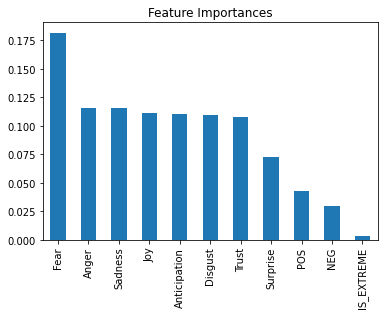

In [ ]:
forest_importances.plot.bar()
plt.title('Feature Importances')
plt.show()

In [ ]:
# 每個運動員的雷達圖

import numpy as np
import matplotlib.pyplot as plt
# 用於正常顯示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
#用於正常顯示符號
plt.rcParams['axes.unicode_minus'] = False

# 使用ggplot的繪圖風格，這個類似於美化了，可以通過plt.style.available查看可選值，你會發現其它的風格真的醜。。。
plt.style.use('ggplot')

# 各運動員的 keymoji
col_list = ['Trust', 'Joy', 'Surprise', 'Anticipation', 'Fear', 'Anger', 'Disgust', 'Sadness']
keymoji_guo = pd.read_csv('/content/drive/Shareddrives/Text Mining/CSV/Keymoji/KeyMoji_score_GUO.csv', usecols=col_list)
key_list_guo = [np.mean(keymoji_guo["Trust"]), np.mean(keymoji_guo["Joy"]), np.mean(keymoji_guo["Surprise"]), np.mean(keymoji_guo["Anticipation"]), np.mean(keymoji_guo["Fear"]), np.mean(keymoji_guo["Anger"]), np.mean(keymoji_guo["Disgust"]), np.mean(keymoji_guo["Sadness"])]
print(key_list_guo)

keymoji_lee = pd.read_csv('/content/drive/Shareddrives/Text Mining/CSV/Keymoji/KeyMoji_score_LEE.csv', usecols=col_list)
key_list_lee = [np.mean(keymoji_lee["Trust"]), np.mean(keymoji_lee["Joy"]), np.mean(keymoji_lee["Surprise"]), np.mean(keymoji_lee["Anticipation"]), np.mean(keymoji_lee["Fear"]), np.mean(keymoji_lee["Anger"]), np.mean(keymoji_lee["Disgust"]), np.mean(keymoji_lee["Sadness"])]
print(key_list_lee)

keymoji_lin = pd.read_csv('/content/drive/Shareddrives/Text Mining/CSV/Keymoji/KeyMoji_score_LIN.csv', usecols=col_list)
key_list_lin = [np.mean(keymoji_lin["Trust"]), np.mean(keymoji_lin["Joy"]), np.mean(keymoji_lin["Surprise"]), np.mean(keymoji_lin["Anticipation"]), np.mean(keymoji_lin["Fear"]), np.mean(keymoji_lin["Anger"]), np.mean(keymoji_lin["Disgust"]), np.mean(keymoji_lin["Sadness"])]
print(key_list_lin)

keymoji_tai = pd.read_csv('/content/drive/Shareddrives/Text Mining/CSV/Keymoji/KeyMoji_score_TAI.csv', usecols=col_list)
key_list_tai = [np.mean(keymoji_tai["Trust"]), np.mean(keymoji_tai["Joy"]), np.mean(keymoji_tai["Surprise"]), np.mean(keymoji_tai["Anticipation"]), np.mean(keymoji_tai["Fear"]), np.mean(keymoji_tai["Anger"]), np.mean(keymoji_tai["Disgust"]), np.mean(keymoji_tai["Sadness"])]
print(key_list_tai)

keymoji_yang = pd.read_csv('/content/drive/Shareddrives/Text Mining/CSV/Keymoji/KeyMoji_score_YANG.csv', usecols=col_list)
key_list_yang = [np.mean(keymoji_yang["Trust"]), np.mean(keymoji_yang["Joy"]), np.mean(keymoji_yang["Surprise"]), np.mean(keymoji_yang["Anticipation"]), np.mean(keymoji_yang["Fear"]), np.mean(keymoji_yang["Anger"]), np.mean(keymoji_yang["Disgust"]), np.mean(keymoji_yang["Sadness"])]
print(key_list_yang)

[1.3223550000000006, 1.2957460000000005, 1.2814030000000003, 1.2468260000000004, 0.4617349999999999, 0.565953, 0.5747830000000003, 0.7167309999999999]
[1.7443060606060607, 2.0634878787878788, 2.0668151515151507, 1.8659121212121212, 0.3747484848484848, 0.492039393939394, 0.5157393939393938, 0.6899969696969697]
[1.235768000000001, 1.2791820000000003, 1.395776, 1.1266770000000006, 1.289103, 1.4215510000000002, 1.4625770000000002, 1.4904519999999999]
[1.2679820000000002, 1.3298090000000002, 1.2987629999999997, 1.1930650000000003, 0.8942620000000001, 0.9204850000000003, 0.9025900000000001, 1.0537710000000002]
[1.2066230000000002, 1.3481299999999996, 1.4705290000000002, 1.0486129999999994, 1.4052810000000002, 1.4188139999999996, 1.4011990000000003, 1.6912589999999996]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


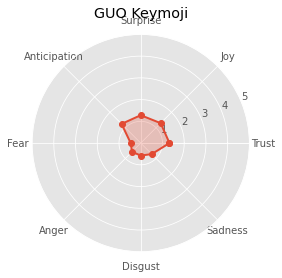

In [ ]:
# 構造數據
# GUO
values = key_list_guo
feature = ['Trust','Joy','Surprise','Anticipation','Fear', 'Anger', 'Disgust', 'Sadness']

# 設置每個數據點的顯示位置，在雷達圖上用角度表示
angles=np.linspace(0, 2*np.pi, len(values), endpoint=False)

# 拼接數據首尾，使圖形中線條封閉
values=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))

# 繪圖
fig=plt.figure()
# 設置爲極座標格式
ax = fig.add_subplot(111, polar=True)
# 繪製折線圖
ax.plot(angles, values, 'o-', linewidth=2)
# 填充顏色
ax.fill(angles, values, alpha=0.25)

# 設置圖標上的角度劃分刻度，爲每個數據點處添加標籤
ax.set_thetagrids(angles * 180/np.pi, feature)

# 設置雷達圖的範圍
ax.set_ylim(0,5)
# 添加標題
plt.title('GUO Keymoji')
# 添加網格線
ax.grid(True)

plt.show()

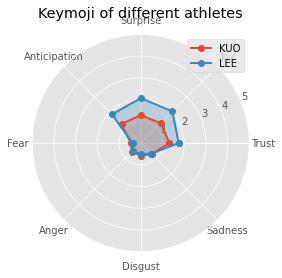

In [ ]:
# LEE
values_2 = key_list_lee
values_2 = np.concatenate([values_2,[values_2[0]]])

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=2,label='KUO')
ax.fill(angles, values, alpha=0.25)

ax.plot(angles, values_2, 'o-', linewidth=2,label='LEE')
ax.fill(angles, values_2, alpha=0.25)

ax.set_thetagrids(angles * 180/np.pi, feature)
ax.set_ylim(0,5)
plt.title('Keymoji of different athletes')
plt.legend(loc='best')
ax.grid(True)
plt.show()

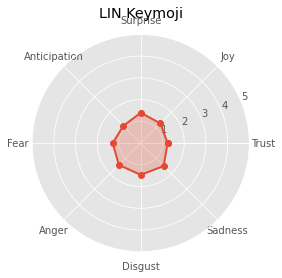

In [ ]:
# LIN
values = key_list_lin
feature = ['Trust','Joy','Surprise','Anticipation','Fear', 'Anger', 'Disgust', 'Sadness']

# 設置每個數據點的顯示位置，在雷達圖上用角度表示
angles = np.linspace(0, 2*np.pi, len(values), endpoint=False)

# 拼接數據首尾，使圖形中線條封閉
values = np.concatenate((values,[values[0]]))
angles = np.concatenate((angles,[angles[0]]))

# 繪圖
fig = plt.figure()
# 設置爲極座標格式
ax = fig.add_subplot(111, polar=True)
# 繪製折線圖
ax.plot(angles, values, 'o-', linewidth=2)
# 填充顏色
ax.fill(angles, values, alpha=0.25)

# 設置圖標上的角度劃分刻度，爲每個數據點處添加標籤
ax.set_thetagrids(angles * 180/np.pi, feature)

# 設置雷達圖的範圍
ax.set_ylim(0,5)
# 添加標題
plt.title('LIN Keymoji')
# 添加網格線
ax.grid(True)

plt.show()

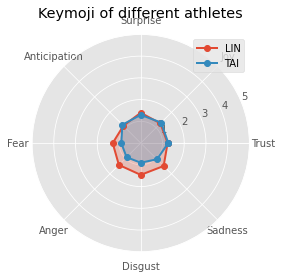

In [ ]:
# TAI
values_2 = key_list_tai
values_2 = np.concatenate([values_2,[values_2[0]]])

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=2,label='LIN')
ax.fill(angles, values, alpha=0.25)

ax.plot(angles, values_2, 'o-', linewidth=2,label='TAI')
ax.fill(angles, values_2, alpha=0.25)

ax.set_thetagrids(angles * 180/np.pi, feature)
ax.set_ylim(0,5)
plt.title('Keymoji of different athletes')
plt.legend(loc='best')
ax.grid(True)
plt.show()

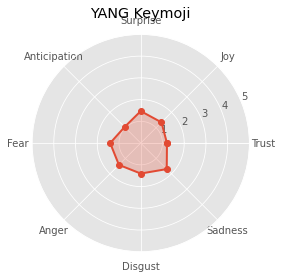

In [ ]:
# YANG
values = key_list_yang
feature = ['Trust','Joy','Surprise','Anticipation','Fear', 'Anger', 'Disgust', 'Sadness']

# 設置每個數據點的顯示位置，在雷達圖上用角度表示
angles = np.linspace(0, 2*np.pi, len(values), endpoint=False)

# 拼接數據首尾，使圖形中線條封閉
values = np.concatenate((values,[values[0]]))
angles = np.concatenate((angles,[angles[0]]))

# 繪圖
fig = plt.figure()
# 設置爲極座標格式
ax = fig.add_subplot(111, polar=True)
# 繪製折線圖
ax.plot(angles, values, 'o-', linewidth=2)
# 填充顏色
ax.fill(angles, values, alpha=0.25)

# 設置圖標上的角度劃分刻度，爲每個數據點處添加標籤
ax.set_thetagrids(angles * 180/np.pi, feature)

# 設置雷達圖的範圍
ax.set_ylim(0,5)
# 添加標題
plt.title('YANG Keymoji')
# 添加網格線
ax.grid(True)

plt.show()

In [ ]:
# df 轉 tsv
data_tsv = data_all.drop(columns=['Title', 'Prediction', 'IS_EXTREME', 'comments'])
data_tsv.to_csv('/content/drive/Shareddrives/Text Mining/CSV/data.tsv', sep='\t', header=None, index=False)